# Metropolis–Hastings approach to inferring the prior of a Bernoulli distribution

This Python Jupyter notebook explores a Metropolis–Hastings algorithm approach to inferring the parameter of a Bernoulli distribution from Independent and Identically Distributed (IID) samples.

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Generate the data
theta_actual = 0.3
n_samples = 100
v = np.random.binomial(1, theta_actual, n_samples)

In [38]:
# Estimate of theta from the data
np.mean(v)

0.23

In [23]:
# Bounds of the uniform prior distribution
a = 0
b = 1

In [24]:
def p_theta_given_v(theta, v, a, b):
    """p(theta | v, a, b)"""
    
    if a <= theta <= b:
        return np.exp(np.log(theta) * np.sum(v) + np.log(1 - theta) * np.sum(1 - v))
    else:
        return 0

In [44]:
# Initialise theta
theta = [(a+b)/2]

# Standard deviation of the proposal distribution
sigma = 0.1

for i in range(1, 10000):
    
    # Candidate value of theta
    theta_candidate = np.random.normal(theta[i-1], sigma)
    
    p_candidate = p_theta_given_v(theta_candidate, v, a, b)
    p_previous = p_theta_given_v(theta[i-1], v, a, b)
    
    # Acceptance probability
    u = min(1, p_candidate / p_previous)
    
    if u >= np.random.uniform():
        theta.append(theta_candidate)
    else:
        theta.append(theta[i-1])

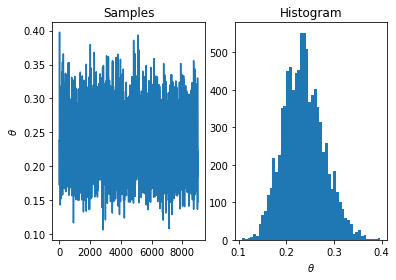

In [45]:
burnin = 1000

f, ax = plt.subplots(1,2)
ax[0].plot(theta[burnin:])
ax[0].set_title("Samples")
ax[0].set_ylabel(r"$\theta$")
ax[1].hist(theta[burnin:], bins=50)
ax[1].set_title("Histogram")
ax[1].set_xlabel(r"$\theta$")
plt.show()